# Determinental Point Process (DPP)

This simple notebook demonstrates how to draw random samples from a FiniteDPP process defined by a square exponential similarity kernel with different values of lenght_scale and prefactor. 

We also compute the log_probability of the generated samples.

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import cellsegmenter as cs

value.shape, mask.shape -> torch.Size([2, 400]) torch.Size([2, 20, 20])
length_scale, prefactor, n, log_prob -> 20 0.1 [3, 3] [-15.37298583984375, -17.554983139038086]
value.shape, mask.shape -> torch.Size([2, 400]) torch.Size([2, 20, 20])
length_scale, prefactor, n, log_prob -> 20 1 [4, 3] [-23.09654998779297, -17.831289291381836]
value.shape, mask.shape -> torch.Size([2, 400]) torch.Size([2, 20, 20])
length_scale, prefactor, n, log_prob -> 20 5 [6, 6] [-26.283910751342773, -27.830690383911133]
value.shape, mask.shape -> torch.Size([2, 400]) torch.Size([2, 20, 20])
length_scale, prefactor, n, log_prob -> 20 10 [5, 6] [-25.650983810424805, -28.95526695251465]
value.shape, mask.shape -> torch.Size([2, 400]) torch.Size([2, 20, 20])
length_scale, prefactor, n, log_prob -> 10 0.1 [1, 7] [-12.220987319946289, -34.44422912597656]
value.shape, mask.shape -> torch.Size([2, 400]) torch.Size([2, 20, 20])
length_scale, prefactor, n, log_prob -> 10 1 [8, 9] [-38.18208312988281, -39.66758346557617]

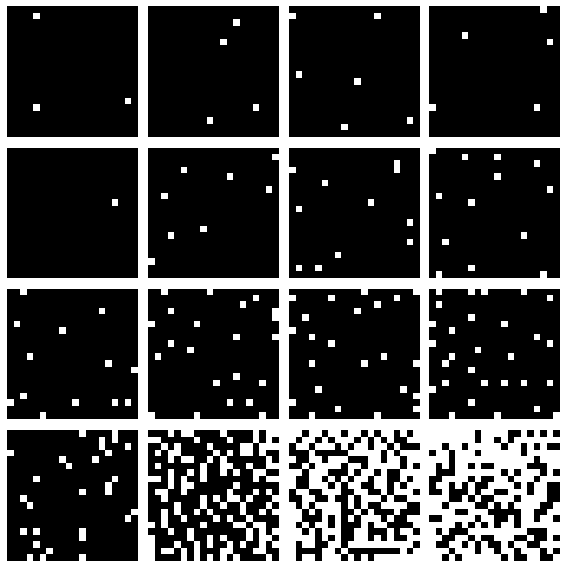

In [41]:
fig, ax =  plt.subplots(ncols=4, nrows=4, figsize=(8,8))
for r, length_scale in enumerate([20,10,5,1]):
    for c, prefactor in enumerate([0.1, 1, 5, 10]):
        KERNEL = cs.SimilarityKernel(length_scale=length_scale, weight=prefactor)
        likelihood_matrix = KERNEL.forward(n_width=20, n_height=20)
        DPP = cs.FiniteDPP(L=likelihood_matrix)
        value = DPP.sample(sample_shape=torch.Size([2]))  # draw two samples
        n_samples = value.sum(dim=-1)
        logp = DPP.log_prob(value=value)        
        mask = kernel.sample_2_mask(value)
        print("value.shape, mask.shape ->",value.shape, mask.shape)
        print("length_scale, prefactor, n, log_prob ->",length_scale,prefactor,n_samples.tolist(),logp.tolist())
        
        ax[r,c].axis('off')
        ax[r,c].imshow(mask[0], cmap='gray')
fig.tight_layout()
fig.savefig("./DPP_samples.png")